# Seção Principal: Sumário do Projeto / Estrutura do Notebook
Seção 1: 'Introdução ao Projeto'

    1.1. Contextualização

    1.2. Objetivos

    1.3. Justificativas

---
Seção 2: 'Realizando a Análise Exploratória dos Dados'

    2.1. Importando as bibliotecas e a Base de Dados

    2.2. Análise Inicial dos Dados

    2.3. Como os dados estão distribuidos?

---
Seção 3: 'Realizando a Análise Preditiva'

    3.1. Modelo 1: 'XGBoost'

    3.1.1. Definindo os hiperparâmetros com Validação Cruzada

    3.1.2. Treinamento do modelo e validando com métricas estatísticas

    3.1.3. Resultados do XGBoost

    3.2. Modelo 2: 'Logistic Regression'
    
    3.3. Comparação entre os dois modelos (XGBoost e Regressão Logística)

    3.4. Considerações Finais

---
Seção 4: 'Realizando a Análise Descritiva'

    4.1. Clusterização com K-Means

    4.1.1. Padronizando os dados com StandardScaler

    4.1.2. Escolhendo o número de Clusters com Elbow Method e Silhouette Score

    4.1.3. Redução da Dimensionalidade com PCA

    4.1.4. Análise Final dos Clusters


# Seção 1: Introdução ao Projeto

## 1.1. Contextualização Breve

O câncer de mama é uma doença que afeta diversas mulheres ao redor do mundo e, desta forma, a detecção precoce se torna algo necessário.

Com o avanço da Ciência de Dados e do Aprendizado de Máquina, podemos realizar essa detecção e evitar que a doença piore, podendo ser tratada enquanto ainda está em uma fase inicial.

## 1.2. Objetivos

O principal objetivo deste projeto é desenvolver um modelo capaz de realizar a detecção do câncer de mama com base em dados clínicos, utilizando técnicas de aprendizado de máquina supervisionado. Além disso, busca-se aplicar algoritmos de clusterização para segmentar os dados de forma descritiva, explorando possíveis agrupamentos de pacientes com características semelhantes.

De forma complementar, este projeto também tem como finalidade consolidar meus conhecimentos práticos em Ciência de Dados e Machine Learning, por meio da aplicação de técnicas modernas como o XGBoost na análise preditiva e o K-Means na análise descritiva.

# Seção 2: Realizando a Análise Exploratória dos Dados

## 2.1. Importando as bibliotecas e a Base de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# Salvando a base de dados em um DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Adicionando a coluna alvo 'target'
df['target'] = data.target

df.query('target == 1').count()

,0
mean radius,357
mean texture,357
mean perimeter,357
mean area,357
mean smoothness,357
mean compactness,357
mean concavity,357
mean concave points,357
mean symmetry,357
mean fractal dimension,357


## 2.2. Análise Inicial dos Dados

<h2>Nota sobre os dados: 'target == 1' indica Tumor Benigno, enquanto 'target == 0' indica Tumor Maligno

In [ ]:
# Printando as 5 primeiras linhas do DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Printando as 5 últimas linhas do DataFrame
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# Verificando as Dimensões do DataFrame
print(f"{df.shape[0]} linhas e {df.shape[1]} colunas")

569 linhas e 31 colunas


In [ ]:
# Verificando o tamanho do DataFrame
print(f"Total de elementos: {df.size}")

Total de elementos: 17639


In [ ]:
# Descrição Geral do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Descrição Estatística do DataFrame
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# Verificando se há dados nulos

if df.isnull().values.any():
    print("Há dados nulos no DataFrame.")
else:
    print("Não há dados nulos no DataFrame.")

Não há dados nulos no DataFrame.


In [ ]:
# Verificando se há linhas duplicadas

if df.duplicated().any():
    print("Há linhas duplicadas no DataFrame.")
else:
    print("Não há linhas duplicadas no DataFrame.")

Não há linhas duplicadas no DataFrame.


## 2.3. Como os dados estão distribuidos?

In [ ]:
df_benigno = df[df['target'] == 1]
df_maligno = df[df['target'] == 0]

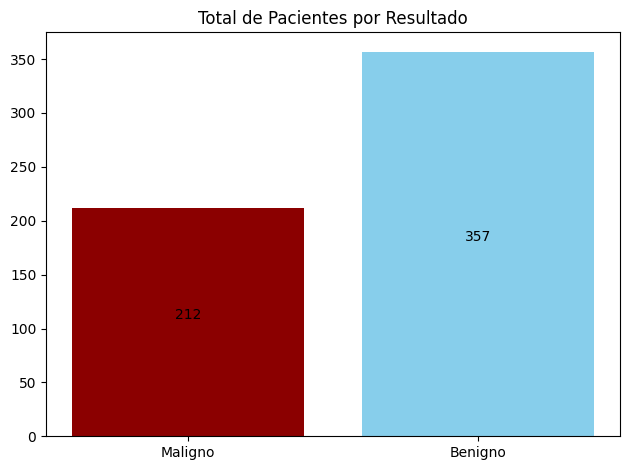

In [ ]:
plt.title("Total de Pacientes por Resultado")
bars = plt.bar(['Maligno', 'Benigno'], [df_maligno.shape[0], df_benigno.shape[0]], color=['darkred', 'skyblue'])
plt.tight_layout()

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height - height/2, f"{height:.0f}", ha='center', va='bottom')

plt.show()


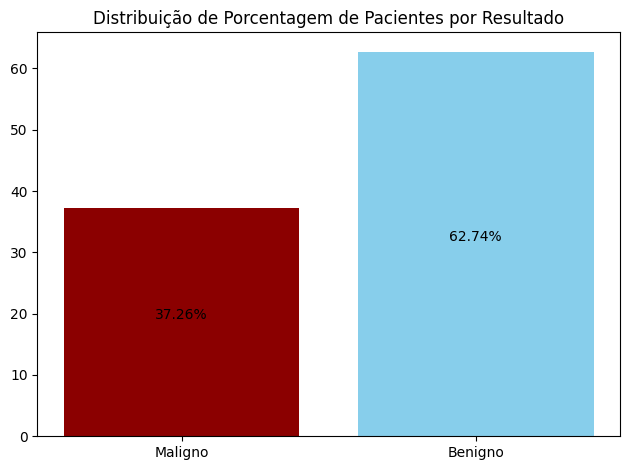

In [ ]:
porcentagem_mal = df_maligno['target'].count() / df['target'].count() * 100
porcentagem_ben = df_benigno['target'].count() / df['target'].count() * 100

plt.title("Distribuição de Porcentagem de Pacientes por Resultado")
bars = plt.bar(['Maligno', 'Benigno'], [porcentagem_mal, porcentagem_ben], color=['darkred', 'skyblue'])
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - height/2, f'{height:.2f}%', ha='center', va='bottom')

plt.show()



<h3>Distribuição dos Tipos de Tumores</h3> A partir dos dados fornecidos, observamos que os casos de tumores <strong>benignos</strong> são significativamente mais comuns do que os <strong>malignos</strong>. Foram identificados <strong>357 tumores benignos</strong> e <strong>212 malignos</strong> o que representa aproximadamente <strong>62,74%</strong> e <strong>37,26%</strong> dos casos avaliados, respectivamente. Esses números já nos permitem ter uma noção clara da frequência com que cada tipo de tumor ocorre no conjunto de dados.

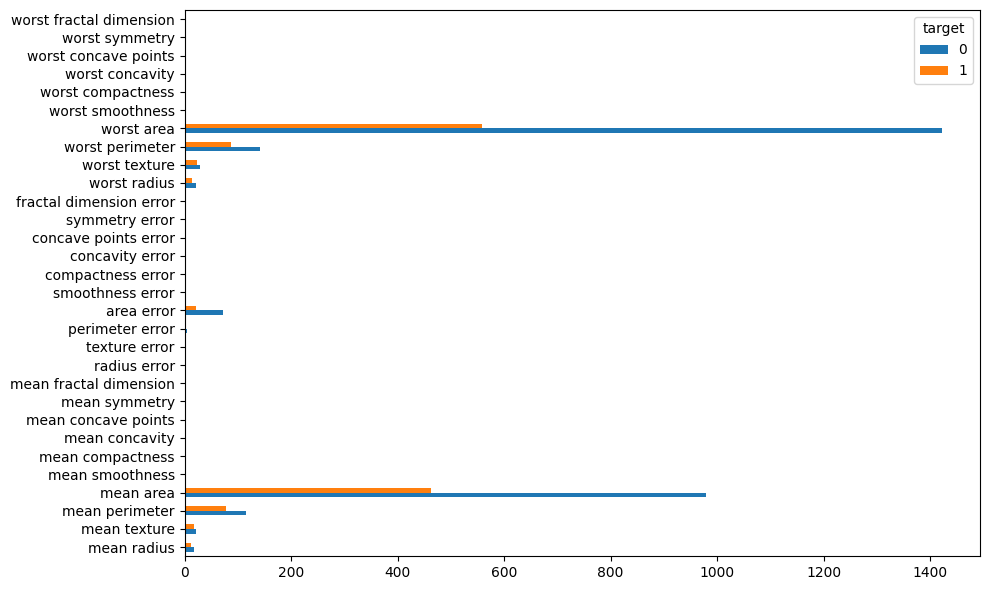

In [ ]:
df.groupby('target').mean().T.plot(kind='barh', figsize=(10, 6))
plt.tight_layout()

<h3>Análise Comparativa das Features por Tipo de Tumor</h3>

<p>
Ao analisarmos a média das features agrupadas por classe (benigno vs. maligno), observamos que algumas características se destacam com maior intensidade nos tumores malignos.
Notavelmente, as variáveis <strong>'worst area'</strong> e <strong>'mean area'</strong> apresentam valores médios significativamente maiores em tumores malignos em relação aos benignos.
</p>

<p>
Além disso, outras variáveis como <strong>'mean radius'</strong>, <strong>'worst perimeter'</strong> e <strong>'mean concavity'</strong> também demonstram diferenças consideráveis entre as classes, ainda que não tão marcantes quanto as mencionadas anteriormente.
</p>

<p>
É importante ressaltar que essas diferenças não necessariamente indicam causalidade, mas sim uma <strong>correlação potencial</strong> entre tais características e a presença de malignidade. Essa análise contribui para compreender <strong>quais atributos podem estar mais associados ao diagnóstico</strong>, auxiliando na seleção de features e na interpretação dos modelos preditivos.
</p>


<h3>Análise da Feature 'Mean Area' por Tipo de Tumor

<Axes: xlabel='mean area', ylabel='Count'>

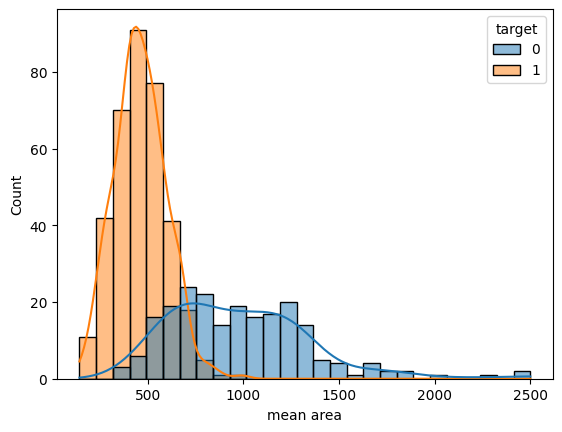

In [ ]:
sns.histplot(data=df, x='mean area', hue='target', kde=True)


O histograma da feature <strong>mean area</strong> mostra uma clara distinção entre os dois grupos. A maior parte dos <strong>tumores benignos</strong> (classe 1) está concentrada na faixa entre aproximadamente <strong>150 e 600</strong>, com uma distribuição em forma de sino, indicando uma variação pequena.

Já os <strong>tumores malignos</strong> (classe 0) apresentam uma distribuição bem mais dispersa, com valores se estendendo além de <strong>1300 até 2500</strong>. A densidade de casos malignos começa a aumentar a partir de valores em torno de <strong>500</strong>, com maior frequência entre <strong>600 e 1300</strong>, sugerindo que áreas médias maiores estão mais associadas à malignidade.

Além disso, é possível observar que poucos pacientes benignos apresentam valores de <strong>mean area</strong> acima de 1000, reforçando que esta feature pode ser um bom <strong>indicador discriminativo</strong> entre as classes.

<h3>Análise da Feature 'Worst Area' por Tipo de Tumor

<Axes: xlabel='worst area', ylabel='Count'>

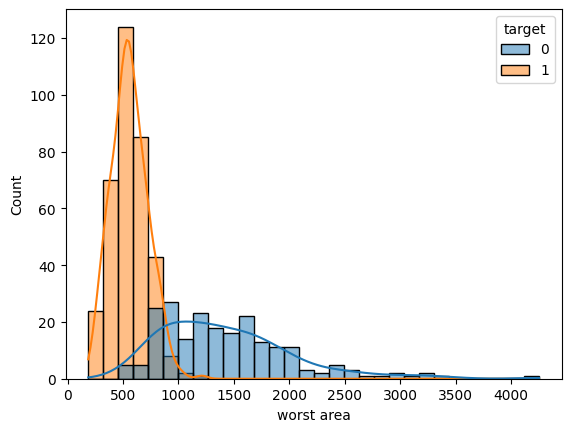

In [ ]:
sns.histplot(data=df, x='worst area', hue='target', kde=True)


Assim como observado na feature <strong>mean area</strong>, a <strong>worst area</strong> também apresenta uma distinção marcante entre os dois grupos.

Pacientes com <strong>tumores benignos</strong> (classe 1) estão majoritariamente concentrados em valores entre <strong>200 e 800</strong>, com o pico de frequência ao redor de <strong>500</strong>. Já os <strong>tumores malignos</strong> (classe 0) tendem a apresentar valores mais elevados de área, com maior concentração entre aproximadamente <strong>1000 e 2000</strong>, e alguns casos extremos chegando a quase <strong>4000</strong>.

Essa separação clara sugere que a <strong>worst area</strong> pode ser uma variável altamente relevante na identificação de malignidade, indicando que tumores com maior área no pior cenário avaliado são fortemente associados a diagnósticos malignos.

Em termos práticos, essa feature pode servir como uma das principais variáveis preditoras para modelos de classificação, além de reforçar a importância de avaliar medidas extremas e não apenas médias.

<h3>Análise da Feature 'Mean Perimeter' por Tipo de Tumor

<Axes: xlabel='mean perimeter', ylabel='Count'>

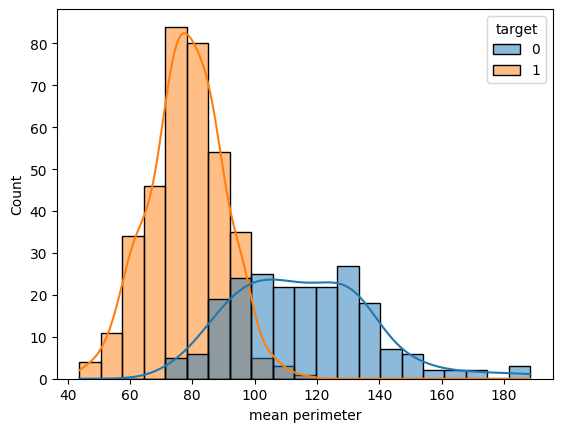

In [ ]:
sns.histplot(data=df, x='mean perimeter', hue='target', kde=True)


A análise da feature <strong>mean perimeter</strong> também evidencia uma distinção relevante entre os dois grupos, ainda que menos acentuada do que nas variáveis <em>mean area</em> e <em>worst area</em>.

Pacientes com <strong>tumores benignos</strong> (classe 1) apresentam uma distribuição concentrada entre os valores de aproximadamente <strong>60 a 100</strong>, com o pico de frequência entre <strong>70 e 90</strong>. Após esse intervalo, a presença de casos benignos começa a cair consideravelmente.

Por outro lado, os <strong>tumores malignos</strong> (classe 0) tendem a apresentar valores mais altos de perímetro médio, com maior concentração a partir de <strong>100 até cerca de 140</strong>, e poucos casos acima de 150.

Embora a separação entre as distribuições não seja tão marcada quanto em outras features, ainda assim há indícios de que <strong>tumores malignos possuem, em média, perímetros maiores</strong>. Isso reforça a relevância dessa variável como um possível preditor adicional, principalmente em combinação com outras métricas morfológicas.



## 2.4. O que podemos ter desses resultados?

<h3>Análise Inicial da Distribuição dos Tumores</h3>
Os dados fornecidos apresentam uma leve desproporção na quantidade de casos entre tumores benignos e malignos. Observamos que 62,74% dos casos são benignos, enquanto 37,26% são malignos. Essa diferença indica um leve desbalanceamento no conjunto de dados, o que é importante considerar durante o desenvolvimento e avaliação de modelos preditivos.

<h3>Análise das Principais Features</h3>
Com base nos gráficos analisados, algumas features se destacam por apresentarem maior poder de separação entre os tipos de tumor, como:

- mean area, worst area

- mean perimeter, worst perimeter

- mean radius, worst radius

Essas variáveis tendem a ter valores menores em pacientes com tumores benignos e valores maiores em casos de tumores malignos. Esse padrão sugere que tais características possuem alta relevância na diferenciação entre os dois grupos, sendo fortes candidatas para a construção de modelos de classificação.



# Seção 3: Realizando a Análise Preditiva

Importando todas as bibliotecas a serem utilizadas

In [ ]:
# Importando modelos
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Importando métricas
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, make_scorer, recall_score, f1_score, confusion_matrix, classification_report

## 3.1. Por quê estou utilizando XGBoost e Regressão Logística? Qual o intuito?

Para esta análise preditiva, utilizarei dois modelos: **XGBoost** e **Regressão Logística**. Como o objetivo do conjunto de dados é classificar os tumores como **benignos** ou **malignos**, trata-se de um problema de **classificação binária**, que é o cenário ideal para a aplicação dos modelos escolhidos.

Embora existam outras alternativas, como Árvores de Decisão, optei pelo XGBoost por ser um algoritmo mais **moderno**, **robusto** e **eficaz**, especialmente em problemas com grande volume de dados e múltiplas variáveis. Já a Regressão Logística foi escolhida por ser um modelo mais **simples**, porém **bastante eficiente**, especialmente em conjuntos menores e bem estruturados, como o **Breast Cancer Wisconsin Dataset**, utilizado nesta análise.

O objetivo principal é comparar o desempenho dos dois modelos utilizando validação cruzada, avaliando qual deles apresenta melhores métricas de classificação e, com isso, compreender em quais situações seria mais recomendada a utilização de um ou de outro.

Ao final da análise preditiva, a seguinte pergunta será respondida:
**Qual dos dois modelos é o mais adequado para este tipo de problema?**

A justificativa para essa escolha será documentada com base nos resultados obtidos.

## 3.2. Modelo 1: XGBoost

## 3.2.1. Definindo os hiperparâmetros com Validação Cruzada

In [ ]:
# Obtendo as colunas independentes
colunas = df.columns.tolist()
colunas.remove('target')

X = df[colunas]
y = df['target']

# Separa os dados a serem treinados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Variável que cria o modelo XGBoost a ser utilizado na Validação Cruzada
boosting = XGBClassifier()

<h3>Validação Cruzada com 'RandomizedSearch'

In [ ]:
# Coloca o foco de recall em '0'
recall_maligno = make_scorer(recall_score, pos_label=0)

param_grid = {
    'n_estimators': [10, 20, 50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

rnd_search = RandomizedSearchCV(
    estimator=boosting,
    param_distributions=param_grid,
    n_iter=27,
    scoring=recall_maligno,
    cv=10,
    random_state=2
)
rnd_search.fit(X_train, y_train)

best_param_rnd = rnd_search.best_params_

print("Melhores hiperparâmetros:")
print(best_param_rnd)
print("Melhor recall (maligno):")
print(rnd_search.best_score_)

Melhores hiperparâmetros:
{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.3}
Melhor recall (maligno):
0.9595238095238094


## 3.2.2. Treinamento do modelo e validando com métricas estatísticas

In [ ]:
n_estimators, learning_rate, max_depth = best_param_rnd['n_estimators'], best_param_rnd['learning_rate'], best_param_rnd['max_depth']

# Define o modelo com os hiperparâmetros validados
boosting = XGBClassifier(
    n_estimators=best_param_rnd['n_estimators'],
    learning_rate=best_param_rnd['learning_rate'],
    max_depth=best_param_rnd['max_depth'],
    random_state=42)

# Faz o treinamento do modelo
boosting.fit(X_train, y_train)

# Obtém o y predito
y_pred = boosting.predict(X_test)

In [ ]:
# Obtendo as métricas estatísticas sobre o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)

# Imprimindo as métricas
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}" )
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Acurácia: 0.9649122807017544
Precisão: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299


In [ ]:
# Imprimindo a matrix de confusão e o relatório de classificação
print("Matriz de Confusão:")
print(cnf_matrix)
print("\nRelatório de Classificação:")
print(report)

Matriz de Confusão:
[[ 61   2]
 [  4 104]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [ ]:
# Features Importantes do XGBoost
xgb_importance = boosting.feature_importances_

## 3.2.3. Resultados do XGBoost
```
Matriz de Confusão:
[ 61   2]
[  4 104]

Relatório de Classificação:
class       precision    recall  f1-score   support
0           0.94         0.97    0.95       63
1           0.98         0.96    0.97       108
```
Na primeira linha, temos os resultados do modelo sobre os tumores malignos avaliados. Ao total, foram 63 tumores malignos avaliados dos dados de treino, e com base nisso, o modelo XGBoost avaliou corretamente 61 e errou 2, acertando cerca de 97% dos tumores malignos.

Na segunda linha, temos os resultados do modelo sobre os tumores benignos avaliados. Ao total, foram 108 tumores benignos avaliados dos dados de treino e, com base nisso, o modelo XGBoost avaliou corretamente 104 e errou 4, acertando cerca de 96%.

<h3>O que podemos tirar disso?

Diversos testes com diferentes dados de treino foram feitos até obter o resultado de 97%. Esse é um resultado positivo, apesar de não ser necessariamente a norma, podendo variar entre 94% e 97%. Inicialmente, o modelo não conseguia avaliar os tumores malignos, então precisei mudar o foco da classe 1 (benigno) para classe 0 (malignos). Treinando o modelo com poucos folds (ou seja, menos vezes), o modelo alcançou mais acertos, entretanto... Isso não significa que é mais confiável, então, ao treinar mais vezes, os acertos diminuíram porém a confiabilidade do modelo é alta. <br>
De forma geral: é um modelo que está operando com uma média de acerto verdadeiro de 94%.



## 3.3. Modelo 2: Regressão Logística

## 3.3.1. Definindo e treinando o modelo

In [ ]:
# Os dados a serem treinados já foram definidos na Seção '3.1.1'
# Para haver uma comparação justa entre os dois modelos, os dados de treino
# serão os mesmos

# Cria um pipeline com dados escalados e regressão logística
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

# Define parâmetros para Validação Cruzada
logistic_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

# Recall com foco em tumores malignos
recall_mal = make_scorer(recall_score, pos_label=0)

# Define o modelo com validação cruzada
grid_lr = RandomizedSearchCV(pipe, logistic_grid, cv=10, scoring=recall_mal)

# Realiza o treinamento do modelo
grid_lr.fit(X_train, y_train)

# Obtém o y predito
y_pred = grid_lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
melhor_C = grid_lr.best_params_['logisticregression__C']
melhor_C

1

## 3.3.2. Validando o modelo com métricas estatísticas

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

report = classification_report(y_test, y_pred)
cnf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}" )
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Acurácia: 0.9824561403508771
Precisão: 0.9906542056074766
Recall: 0.9814814814814815
F1 Score: 0.986046511627907


In [ ]:
print("Matriz de Confusão:")
print(cnf_matrix)
print("\nRelatório de Classificação:")
print(report)

Matriz de Confusão:
[[ 62   1]
 [  2 106]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
# Features importantes
grid_lr.best_estimator_.named_steps['logisticregression'].coef_

array([[-0.36619067, -0.36158121, -0.32048262, -0.41717824, -0.19220365,
         0.62202349, -0.74767423, -1.1036456 ,  0.22162459,  0.13947621,
        -1.24418536,  0.15440679, -0.61111145, -0.86862326, -0.17719412,
         0.60075293, -0.08321267, -0.46939674,  0.50545235,  0.69486112,
        -0.81452982, -1.29113423, -0.5373691 , -0.77404741, -0.49635091,
         0.11840842, -0.97487392, -0.80805037, -1.20249734, -0.10324298]])

## 3.3.3. Resultados do LogisticRegressionCV
```
Matriz de Confusão:
[ 62   1]
[ 2  106]

Relatório de Classificação:
class        precision    recall  f1-score   support
0            0.97         0.98    0.98       63
1            0.99         0.98    0.99       108
```

Assim como na seção 3.1.3., na primeira linha temos 63 tumores malignos avaliados nos dados de treino, onde 62 foram avaliados corretamente e 1 foi avaliado incorretamente, indicando uma taxa de acerto de cerca de 98%.

Na segunda linha, temos 108 tumores benignos avaliados nos dados de treino, onde 106 foram avaliados corretamente e 2 foram avaliados incorretamente, indicando uma taxa de acerto de cerca de 98%.

<h3>O que podemos tirar disso?

Apesar do modelo de Regressão Logística com Validação Cruzada ser um modelo simples, obteve resultados levemente superior ao XGBoost. Para uma avaliação dessa, o recall é uma métrica extremamente importante pois avalia quantos dos positivos preditos realmente eram verdadeiros.

Através desses resultados, vemos uma pequena superioridade do modelo de Regressão Logística com Validação Cruzada sobre o modelo XGBoost com Validação Cruzada, mostrando que nesse caso, um modelo simples se provou tão bom quanto um modelo complexo.


## 3.4. Comparação entre os dois modelos

<h2> Comparação de Resultados:

Recall:

| Modelo                     | Classe 0 (Maligno) | Classe 1 (Benigno) |
| -------------------------- | ------------------ | ------------------ |
| XGBoost com CV             | 0.97 (97%)         | 0.96 (96%)         |
| Regressão Logística com CV | 0.98 (98%)         | 0.98 (98%)         |

<br>

Precisão:

| Modelo                     | Classe 0 (Maligno)   | Classe 1 (Benigno)   |
| -------------------------- | ---------- | ---------- |
| XGBoost com CV             | 0.94 (94%) | 0.98 (98%) |
| Regressão Logística com CV | 0.97 (97%) | 0.99 (99%) |

<br>

F1-Score:

| Modelo                     | Classe 0 (Maligno)   | Classe 1 (Benigno)   |
| -------------------------- | ---------- | ---------- |
| XGBoost com CV             | 0.95 (95%) | 0.97 (97%) |
| Regressão Logística com CV | 0.98 (98%) | 0.99 (99%) |




<h2>Gráfico de Comparação entre Recall (Classe 0) dos dois modelos

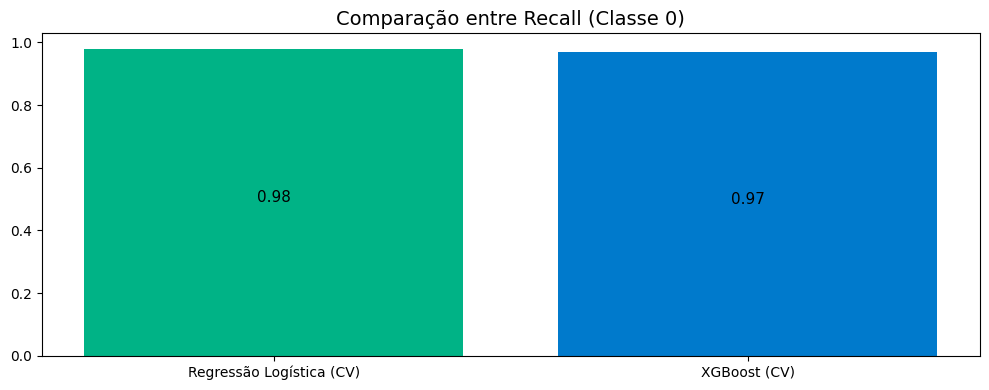

In [ ]:
# Valores de recall para classe 0
recalls = [0.98, 0.97]
labels = ['Regressão Logística (CV)', 'XGBoost (CV)']
colors = ['#00b386', '#007acc']

plt.figure(figsize=(10, 4))
plt.title("Comparação entre Recall (Classe 0)", fontsize=14)
bars = plt.bar(labels, recalls, color=colors)

# Adicionando os valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - height/2, f'{height:.2f}',
             ha='center', fontsize=11)

plt.tight_layout()
plt.show()


<h2>Curva de Aprendizado dos Modelos

In [ ]:
lr_curva = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=melhor_C, max_iter=1000, random_state=42)
)

xgb_curva = XGBClassifier(
    n_estimators=best_param_rnd['n_estimators'],
    learning_rate=best_param_rnd['learning_rate'],
    max_depth=best_param_rnd['max_depth'],
    random_state=42
)

def curva_aprendizado(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=10, scoring=make_scorer(recall_score, pos_label=0),
        train_sizes=np.linspace(0.1, 1, 10), n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label='Recall (Treino)', color='blue')
    plt.plot(train_sizes, val_mean, 'o-', label='Recall (Validação)', color='green')
    plt.title(title)
    plt.xlabel='Tamanho do Conjunto de Treinamento'
    plt.ylabel='Recall (Classe 0)'
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

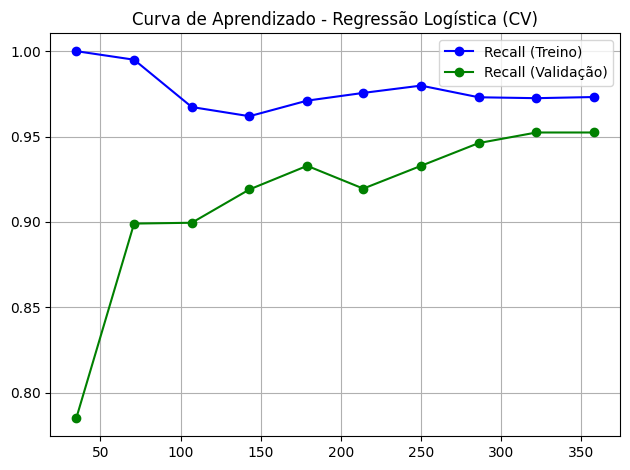

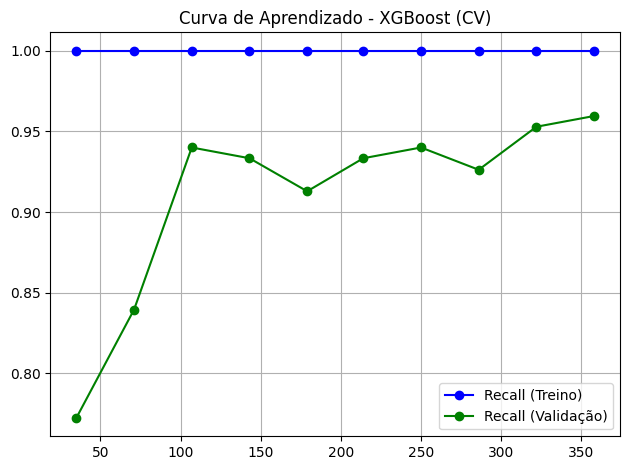

In [ ]:
curva_aprendizado(lr_curva, X_train, y_train, 'Curva de Aprendizado - Regressão Logística (CV)')
curva_aprendizado(xgb_curva, X_train, y_train, 'Curva de Aprendizado - XGBoost (CV)')

## 3.5. Considerações Finais

| Modelo              | Recall Treino | Recall Validação | Diferença | Interpretação           |
| -----------| ------------- | ---------------- | --------- | ----------------------- |
| XGBoost             | 1.0           | ~0.96             | 0.04      | Leve overfitting        |
| Regressão Logística | \~0.98        | ~0.96             | 0.02      | Bom equilíbrio (normal) |


<h4>Conclusão da Comparação entre os Modelos</h4>
Com base na base de dados utilizada, que apresenta um número relativamente pequeno de amostras, o modelo de Regressão Logística com Validação Cruzada demonstrou um desempenho levemente superior ao XGBoost.

<h4>Qual modelo é mais recomendado neste caso?<h4>

---
A resposta é... **Depende**.

---

Para este cenário específico, a Regressão Logística é a escolha mais indicada. Isso se deve à sua simplicidade, leveza computacional e boa capacidade de generalização em conjuntos de dados menores. Além disso, o modelo não apresentou indícios de overfitting ou underfitting, o que o torna ideal para os dados utilizados.

Por outro lado, o XGBoost, embora mais robusto e sofisticado, mostrou sinais de overfitting, possivelmente devido à complexidade desnecessária para um conjunto de dados com poucas amostras. Mesmo com ajustes, seu desempenho ainda não superou o da Regressão Logística neste contexto.

---
**Entretanto...**

Em cenários com uma grande quantidade de dados ou problemas mais complexos, o XGBoost tende a ser mais eficaz. Sua capacidade de modelar relações não lineares e capturar interações entre variáveis faz com que ele seja uma escolha poderosa — ainda que mais pesada computacionalmente. Nestes casos, a sua complexidade se traduz em maior poder preditivo.

---
<h4>Conclusão Geral</h4>

- Para conjuntos de dados pequenos, como o utilizado neste notebook, modelos mais simples como a Regressão Logística podem ser extremamente eficazes e até preferíveis.

- Para conjuntos maiores e problemas mais complexos, modelos mais robustos como o XGBoost tendem a se destacar, mesmo com maior custo computacional.

# Seção 4: Realizando a Análise Descritiva

Importando todas as bibliotecas necessárias

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 4.1. Padronizando os Dados com StandardScaler

In [ ]:
scaler = StandardScaler()

scaled_data = df.drop('target', axis=1)
scaled_data = scaler.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data, columns=df.drop('target', axis=1).columns)
scaled_data['target'] = df['target']

scaled_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


## 4.1.2. Escolhendo o número de Clusters com Elbow Method e Silhouette Score com Distância Euclidiana

<h3>Breve contextualização sobre Silhouette Score</h3>

Na Silhouette Score, o score vai variar entre -1 e 1, onde um valor mais próximo de 1 indica uma clusterização boa e um valor mais próximo de -1 indica uma clusterização ruim.

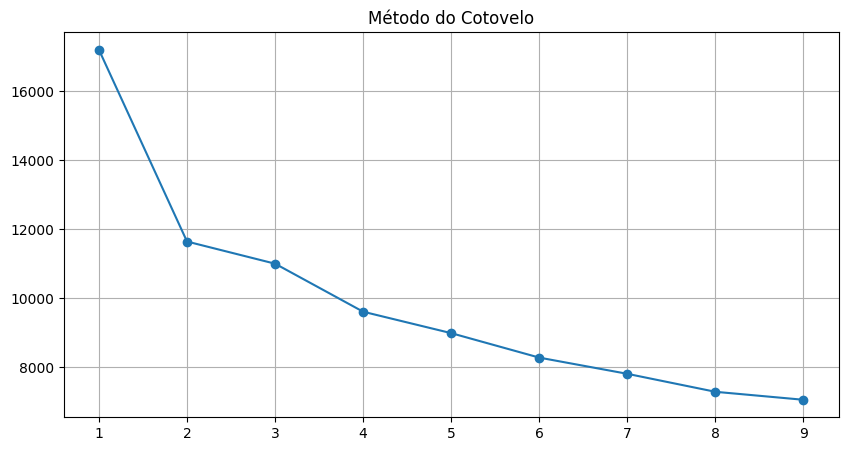

[{'k': 2,
  'silhouette': np.float64(0.3434809120399828),
  'accuracy': np.float64(0.9086115992970123)},
 {'k': 3,
  'silhouette': np.float64(0.3400945840627047),
  'accuracy': np.float64(0.9033391915641477)},
 {'k': 4,
  'silhouette': np.float64(0.31678867887874873),
  'accuracy': np.float64(0.6695957820738138)},
 {'k': 5,
  'silhouette': np.float64(0.30053230728545705),
  'accuracy': np.float64(0.6695957820738138)},
 {'k': 6,
  'silhouette': np.float64(0.1663706961253385),
  'accuracy': np.float64(0.4358523725834798)},
 {'k': 7,
  'silhouette': np.float64(0.14586041347594914),
  'accuracy': np.float64(0.18101933216168717)},
 {'k': 8,
  'silhouette': np.float64(0.15027222951308197),
  'accuracy': np.float64(0.23550087873462214)},
 {'k': 9,
  'silhouette': np.float64(0.1386211040000158),
  'accuracy': np.float64(0.19332161687170474)}]

In [ ]:
# Obtendo o 'melhor' valor de Clusters
def optimize_clusters(data, max_k):
  means = []
  inertia = []
  silhouette_accuracy = []

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k, random_state=9)
    kmeans.fit(data)

    means.append(k)
    inertia.append(kmeans.inertia_)

    if k > 1:
      acc = np.sum(np.equal(data['target'], kmeans.labels_)) / len(data)
      silhouette_accuracy.append({'k': k, 'silhouette': silhouette_score(data.drop('target', axis=1), kmeans.labels_), 'accuracy': acc})

  # Elbow Method / Método do Cotovelo
  fig = plt.subplots(figsize=(10, 5))
  plt.plot(means, inertia, 'o-')
  plt.title('Método do Cotovelo')
  plt.xlabel='Número de Clusters (k)'
  plt.ylabel='Inércia'
  plt.grid(True)
  plt.show()

  return silhouette_accuracy

optimize_clusters(scaled_data.drop(['kmeans_2', 'kmeans_3'], axis=1), 10)

Com base no gráfico de inércia (Método do Cotovelo), observamos uma redução acentuada de `k = 1` para `k = 2`, seguida de uma queda mais suave entre `k = 2` e `k = 4`. Após `k = 4`, a inércia continua caindo, mas com ganho marginal, indicando que adicionar mais clusters não traz grande benefício em termos de compactação dos grupos.

Além disso, os valores do **Silhouette Score** e da **Acurácia** também reforçam essa análise:

| Nº de Clusters (k) | Silhouette Score | Acurácia |
|--------------------|------------------|----------|
| 2                  | 0.343            | 0.908    |
| 3                  | 0.340            | 0.903    |
| 4                  | 0.316            | 0.669    |
| 5                  | 0.300            | 0.669    |
| 6                  | 0.166            | 0.435    |
| 7                  | 0.145            | 0.181    |
| 8                  | 0.150            | 0.235    |
| 9                  | 0.138            | 0.193    |

Como mostrado na tabela acima, o melhor equilíbrio entre separação dos grupos (Silhouette Score) e consistência com os rótulos reais (Acurácia) ocorre com **2 ou 3 clusters**.

- A diferença de Silhouette entre `k = 2` e `k = 3` é mínima (0.343 vs 0.340).
- A acurácia também permanece alta em ambos os casos (acima de 90%).
- A partir de `k = 4`, os valores começam a cair significativamente, indicando overfitting ou segmentações não representativas.

**Conclusão parcial:**  
Com base no Método do Cotovelo, Silhouette Score e Acurácia, o número ideal de clusters está entre **2 e 3**.  
A escolha definitiva será feita na próxima seção com base na análise visual e distribuição dos dados após a projeção com PCA.

## 4.1.3. Reduzindo dimensionalidade com PCA

In [ ]:
kmeans_2 = KMeans(n_clusters=2, random_state=9)
kmeans_3 = KMeans(n_clusters=3, random_state=9)

kmeans_2.fit(scaled_data.drop('target', axis=1))
kmeans_3.fit(scaled_data.drop('target', axis=1))

KMeans(n_clusters=3, random_state=9)

In [ ]:
scaled_data['kmeans_2'] = kmeans_2.labels_
scaled_data['kmeans_3'] = kmeans_3.labels_

In [ ]:
scaled_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kmeans_2,kmeans_3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0,0,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,0,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0,0,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0,0,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0,0,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0,0,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0,0,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0,0,0


In [ ]:
# Pega todas as features exceto target, kmeans_2 e kmeans_3
X_features = scaled_data.drop(['target', 'kmeans_2', 'kmeans_3'], axis=1)

# Definindo a dimensão para 2D
pca = PCA(n_components=2)
pca.fit(X_features)

# Transforma os dados em 2D
X_pca = pca.transform(X_features)

<h1>Gráfico de Distribuição com 3 Clusters</h1>

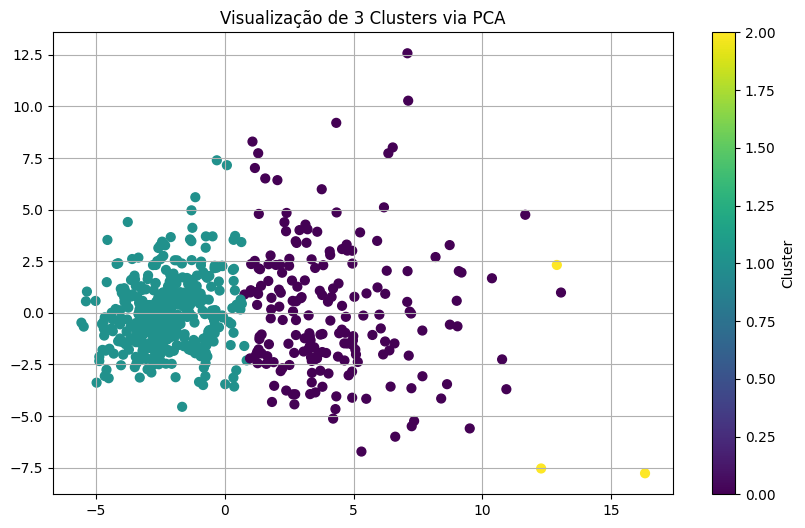

Componente Principal 1
Componente Principal 2


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=scaled_data['kmeans_3'], cmap='viridis', s=40)

plt.title("Visualização de 3 Clusters via PCA")

plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
print("Componente Principal 1")
print("Componente Principal 2")

In [ ]:
scaled_data['kmeans_3'].value_counts()

,count
kmeans_3,
1,373
0,193
2,3


<h1>Gráfico de Distribuição com 2 Clusters</h1>

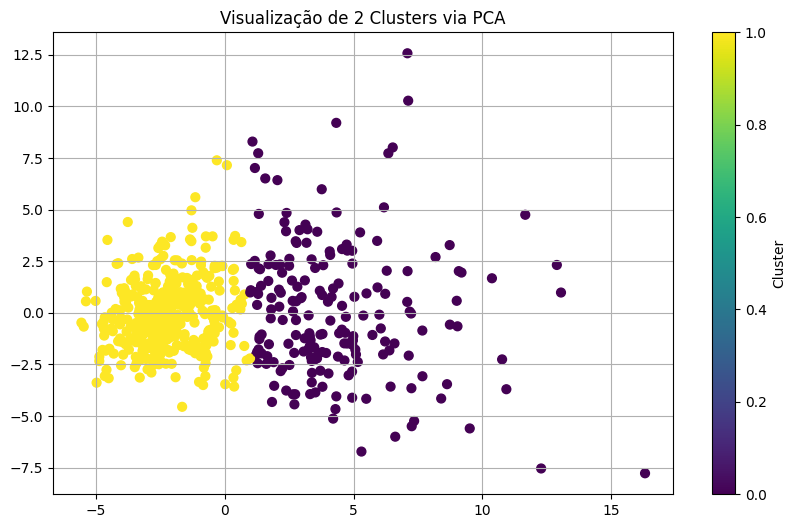

Componente Principal 1
Componente Principal 2


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=scaled_data['kmeans_2'], cmap='viridis', s=40)

plt.title("Visualização de 2 Clusters via PCA")

plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
print("Componente Principal 1")
print("Componente Principal 2")

In [ ]:
scaled_data['kmeans_2'].value_counts()

,count
kmeans_2,
1,375
0,194


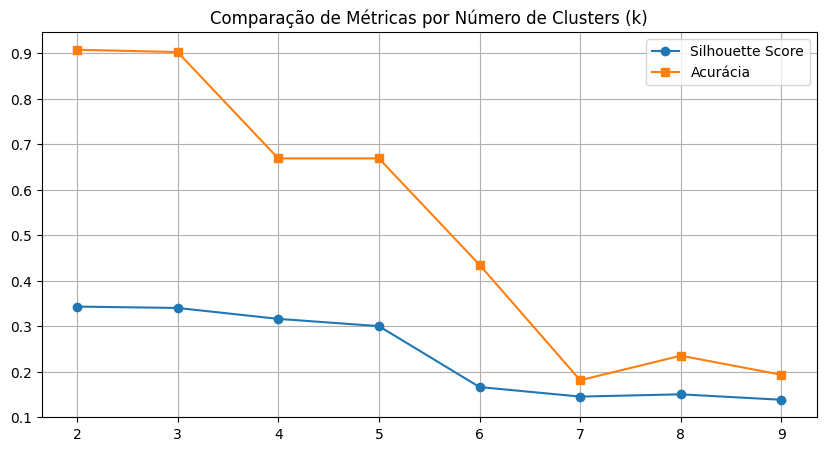

In [ ]:
# Visualização Comparativa: Silhouette Score e Acurácia

resultados = [
    {'k': 2,
      'silhouette': np.float64(0.343),
      'accuracy': np.float64(0.908)},
    {'k': 3,
      'silhouette': np.float64(0.340),
      'accuracy': np.float64(0.903)},
    {'k': 4,
      'silhouette': np.float64(0.316),
      'accuracy': np.float64(0.669)},
    {'k': 5,
      'silhouette': np.float64(0.300),
      'accuracy': np.float64(0.669)},
    {'k': 6,
      'silhouette': np.float64(0.166),
      'accuracy': np.float64(0.435)},
    {'k': 7,
      'silhouette': np.float64(0.145),
      'accuracy': np.float64(0.181)},
    {'k': 8,
      'silhouette': np.float64(0.150),
      'accuracy': np.float64(0.235)},
    {'k': 9,
      'silhouette': np.float64(0.138),
      'accuracy': np.float64(0.193)}
]

df = pd.DataFrame(resultados)

plt.figure(figsize=(10, 5))
plt.plot(df['k'], df['silhouette'], label='Silhouette Score', marker='o')
plt.plot(df['k'], df['accuracy'], label='Acurácia', marker='s')
plt.title('Comparação de Métricas por Número de Clusters (k)')
plt.legend()
plt.grid(True)
plt.show()


## 4.1.4. Análise Final sobre os Clusters

Com a redução de dimensionalidade via PCA e a visualização dos dados em 2D, foi possível analisar a separação entre os grupos definidos pelos algoritmos de clustering.

Ao comparar os cenários com 2 e 3 clusters, observa-se que não há uma separação visualmente muito distinta entre os grupos adicionais no cenário com 3 clusters. No entanto, isso não implica que ambos sejam igualmente válidos.

No caso de 3 clusters, ao analisarmos a distribuição de pacientes, percebe-se que o terceiro grupo contém apenas 3 pacientes, uma proporção muito pequena em relação ao total. No gráfico de dispersão, dois desses pacientes estão juntos, mas distantes dos demais, enquanto o terceiro se encontra isolado, mais próximo visualmente do Grupo 2. Isso indica que este terceiro grupo pode estar representando outliers ou variações individuais não significativas o suficiente para justificar um novo cluster.

As métricas reforçam essa conclusão:

- **Silhouette Score**: 0.343 (k=2) vs 0.340 (k=3)
- **Acurácia**: 0.908 (k=2) vs 0.903 (k=3)

Apesar dos valores serem muito próximos, o custo de interpretar e justificar a existência de um terceiro grupo com apenas 3 pacientes pode levar a interpretações incorretas ou exageradas.

**Conclusão:**  
Optar por **2 clusters** se mostra a escolha mais coerente neste caso, pois:
- Representa melhor a estrutura natural dos dados;
- Evita a influência de possíveis outliers na formação de um grupo separado;
- Facilita a análise posterior de perfil dos grupos, já que ambos têm representatividade significativa.

Essa decisão leva em conta, principalmente, o equilíbrio entre análise quantitativa (métricas) e qualitativa (distribuição visual e proporção). Esse tipo de análise é essencial em problemas de clusterização, onde rótulos não são definidos, para garantir que a segmentação dos grupos seja feita de forma coerente e interpretável.


## 4.2. Análise dos Perfis dos Grupos (k = 2)


In [ ]:
grupo_0 = scaled_data[scaled_data['kmeans_2'] == 0]
grupo_1 = scaled_data[scaled_data['kmeans_2'] == 1]

grupo_0.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kmeans_2,kmeans_3
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.0,194.000000
mean,0.933624,0.462065,0.967305,0.924243,0.601167,1.016789,1.119270,1.134996,0.597456,0.288288,...,0.965253,0.610976,0.951497,1.037713,1.121329,0.586382,0.650893,0.092784,0.0,0.030928
std,1.009848,0.949002,0.985995,1.125800,0.921430,0.924353,0.882634,0.823027,1.001547,1.262196,...,1.129869,0.975234,1.025984,0.885372,0.635912,1.200250,1.211513,0.290879,0.0,0.247416
min,-1.447987,-2.073335,-1.366651,-1.167189,-1.611917,-0.487072,-0.057493,-0.531076,-1.838683,-1.780172,...,-1.025712,-1.935293,-0.653093,-0.365516,-0.347109,-2.099484,-1.590202,0.000000,0.0,0.000000
25%,0.223010,-0.119180,0.284458,0.069143,-0.005357,0.363565,0.445396,0.553754,-0.052459,-0.580524,...,0.105460,-0.027117,0.243546,0.416240,0.653888,-0.146014,-0.239996,0.000000,0.0,0.000000
50%,0.959317,0.409646,0.971305,0.848853,0.529451,0.858673,0.943515,1.002376,0.494270,0.037197,...,0.832226,0.531791,0.824023,0.875363,1.058154,0.381383,0.443558,0.000000,0.0,0.000000
75%,1.604029,1.026900,1.593277,1.596568,1.175277,1.504918,1.561533,1.468473,1.154178,1.015698,...,1.527480,1.096178,1.376193,1.528306,1.482214,1.152255,1.242931,0.000000,0.0,0.000000
max,3.971288,4.651889,3.976130,5.250529,4.770911,4.568425,4.243589,3.927930,4.484751,4.910919,...,5.930172,3.955374,5.112877,4.700669,2.685877,6.046041,6.846856,1.000000,0.0,2.000000


In [ ]:
grupo_1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,kmeans_2,kmeans_3
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.0,375.000000
mean,-0.482995,-0.239041,-0.500419,-0.478142,-0.311004,-0.526019,-0.579036,-0.587171,-0.309084,-0.149141,...,-0.499358,-0.316078,-0.492241,-0.536843,-0.580101,-0.303355,-0.336729,0.904000,1.0,0.994667
std,0.555954,0.942655,0.532222,0.441603,0.893759,0.516482,0.365188,0.397400,0.850179,0.796147,...,0.359566,0.858363,0.515378,0.518964,0.568393,0.712286,0.656134,0.294985,0.0,0.072932
min,-2.029648,-2.229249,-1.984504,-1.454443,-3.112085,-1.610136,-1.114873,-1.261820,-2.744117,-1.819865,...,-1.222423,-2.682695,-1.443878,-1.305831,-1.745063,-2.160960,-1.601839,0.000000,1.0,0.000000
25%,-0.814352,-0.887694,-0.830972,-0.760055,-0.939048,-0.914143,-0.851470,-0.864592,-0.858405,-0.726892,...,-0.727131,-0.952054,-0.889737,-0.925651,-0.931201,-0.757535,-0.804129,1.000000,1.0,1.000000
50%,-0.507616,-0.365268,-0.533785,-0.535229,-0.412068,-0.593200,-0.645568,-0.646375,-0.374655,-0.254830,...,-0.558987,-0.296707,-0.549402,-0.610190,-0.563022,-0.339339,-0.398762,1.000000,1.0,1.000000
75%,-0.138398,0.246751,-0.167810,-0.234465,0.264715,-0.177499,-0.362391,-0.400945,0.224100,0.300871,...,-0.316307,0.275351,-0.196981,-0.214634,-0.234889,0.144378,-0.010851,1.000000,1.0,1.000000
max,1.329956,3.378983,1.191672,1.271629,2.899260,1.170425,0.721919,0.668344,3.400421,3.827870,...,0.930669,2.565776,1.182806,1.275717,1.693103,3.205219,3.582864,1.000000,1.0,1.000000


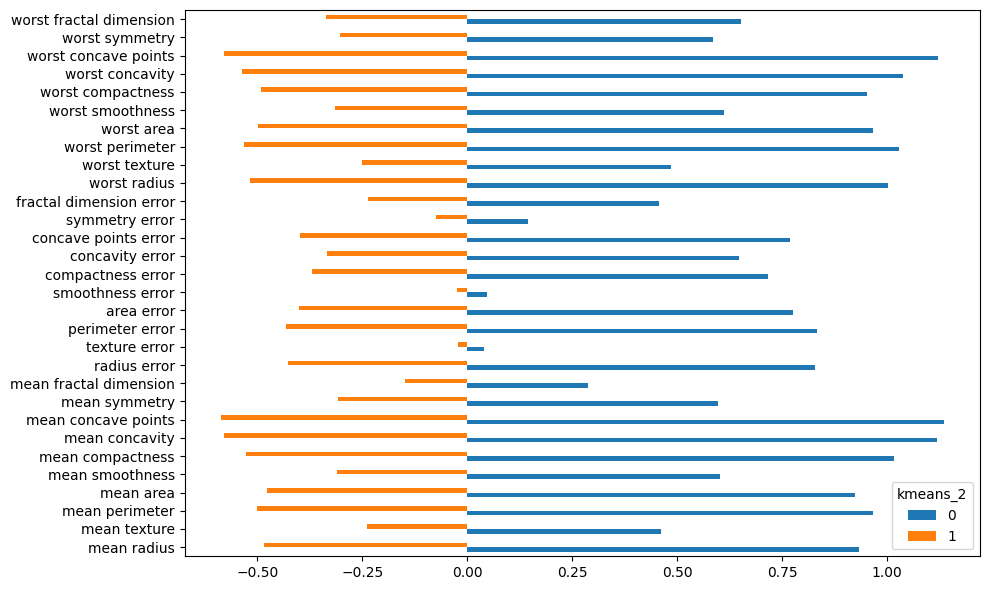

In [ ]:
features = scaled_data.drop(columns=['target', 'kmeans_2', 'kmeans_3'], errors='ignore')

features.groupby(scaled_data['kmeans_2']).mean().T.plot(kind='barh', figsize=(10, 6))
plt.tight_layout()

<h1></h2>